# PyTorch Beginner's Toolkit: Deep Learning Fundamentals

### Getting Started with PyTorch - A Data Scientist's Guide to Deep Learning
Technology Chosen: PyTorch

Why PyTorch?

As a data scientist familiar with traditional ML, I chose PyTorch to expand into deep learning because:

•	Dynamic computational graphs make it more intuitive than TensorFlow

•	Pythonic design feels natural

•	Strong research community and extensive documentation

•	Industry standard for research and increasingly for production

End Goal: Build a working neural network for image classification that can recognize handwritten digits.

### Quick Summary of PyTorch
PyTorch is an open-source machine learning library developed by Facebook's AI Research lab. It's built on the Torch library and provides:

•	Dynamic computation graphs (define-by-run)

•	Automatic differentiation for gradient computation

•	GPU acceleration support

•	Flexible neural network building blocks

Where it's used:
Research institutions, tech companies (Facebook, Tesla, OpenAI), and production ML systems.

Real-world example:
Tesla uses PyTorch for their computer vision models in autonomous driving.


 uses the pip install command to install three Python packages: torch, torchvision, and torchaudio.


In [22]:
pip install torch torchvision torchaudio

In [23]:
#this cell verifies that PyTorch and torchvision are imported and reports the PyTorch version
#and whether GPU acceleration (via CUDA) is available.
import torch
import torchvision
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")


PyTorch version: 2.6.0+cu124
CUDA available: False


In [24]:
#In essence, this cell is showing how to create a tensor with random values
#and display its contents. Tensors are the fundamental data structure in PyTorch, similar to arrays in NumPy,
#and they are used to perform mathematical operations that are crucial for deep learning.# Test basic tensor operations
x = torch.rand(3, 3)
print("Random tensor:")
print(x)


Random tensor:
tensor([[0.0400, 0.4949, 0.2858],
        [0.2152, 0.3412, 0.3431],
        [0.7911, 0.8983, 0.9795]])


In [25]:
#Tensors - The Foundation
# this cell illustrates how to create tensors from existing Python data structures and
# how to perform fundamental matrix multiplication using torch.mm(), a common operation in linear algebra and deep learning.
import torch

# Creating tensors
data = [[1, 2], [3, 4]]
tensor = torch.tensor(data)
print(f"Tensor: {tensor}")

# Tensor operations
a = torch.rand(2, 2)
b = torch.rand(2, 2)
result = torch.mm(a, b)  # Matrix multiplication
print(f"Matrix multiplication result: {result}")


Tensor: tensor([[1, 2],
        [3, 4]])
Matrix multiplication result: tensor([[0.7336, 0.3889],
        [0.1938, 0.3340]])


In [26]:
#2. Autograd - Automatic Differentiation
#In essence, this cell illustrates how to enable gradient computation for a tensor,
# define a function, and then automatically calculate the gradient of the function's output with respect to the input tensor using autograd.
# This is a fundamental concept in training neural networks, as it's used to update model weights during backpropagation.
# Gradient computation
x = torch.tensor([2.0], requires_grad=True)
y = x**2 + 3*x + 1
y.backward()  # Compute gradients
print(f"Gradient of y with respect to x: {x.grad}")


Gradient of y with respect to x: tensor([7.])


In [27]:
#this cell defines a simple feedforward neural network with three linear layers and ReLU activation functions,
#ready to be used for a task like classification.


import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)   # Hidden layer
        self.fc3 = nn.Linear(64, 10)    # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create model instance
model = SimpleNet()
print(model)


SimpleNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [28]:
import torch.optim as optim
import torch.nn as nn # Import nn module if not already imported

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of training epochs
num_epochs = 10 # Example: train for 10 epochs

# Training loop structure
# Replace with your actual dataloader
# dataloader = your_dataloader_here

for epoch in range(num_epochs):
    # Assuming you have a dataloader ready
    # for batch in dataloader:
        # Assuming batch contains inputs and labels
        # inputs, labels = batch

        # Forward pass
        # outputs = model(inputs)
        # loss = criterion(outputs, labels)

        # Backward pass and optimize
        # optimizer.zero_grad()
        # loss.backward()
        # optimizer.step()

        # Optional: Print loss or other metrics periodically
        # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    print(f'Epoch [{epoch+1}/{num_epochs}] completed.') # Placeholder print

Epoch [1/10] completed.
Epoch [2/10] completed.
Epoch [3/10] completed.
Epoch [4/10] completed.
Epoch [5/10] completed.
Epoch [6/10] completed.
Epoch [7/10] completed.
Epoch [8/10] completed.
Epoch [9/10] completed.
Epoch [10/10] completed.


In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [30]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])



Using device: cpu


In [31]:
# Download and load datasets
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


In [32]:
# Define the neural network
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

In [33]:
def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)


In [36]:
# Initialize model, loss function, and optimizer
model = MNISTNet().to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 300 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    return running_loss / len(train_loader)


In [38]:
# Testing function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, '
          f'Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')
    return accuracy

# Train the model
print("Starting training...")
train_losses = []
test_accuracies = []

for epoch in range(1, 6):  # Train for 5 epochs
    train_loss = train(model, device, train_loader, optimizer, epoch)
    test_accuracy = test(model, device, test_loader)
    train_losses.append(train_loss)
    test_accuracies.append(test_accuracy)


Starting training...
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.012295
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.029600
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.034054
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.106796

Test set: Average loss: 0.0001, Accuracy: 9778/10000 (97.78%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.020083
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.081740
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.029090
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.062986

Test set: Average loss: 0.0001, Accuracy: 9801/10000 (98.01%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.020935
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.024766
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.016987
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.003219

Test set: Average loss: 0.0001, Accuracy: 9810/10000 (98.10%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.036332
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.043053
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.003009
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.012390

Test s

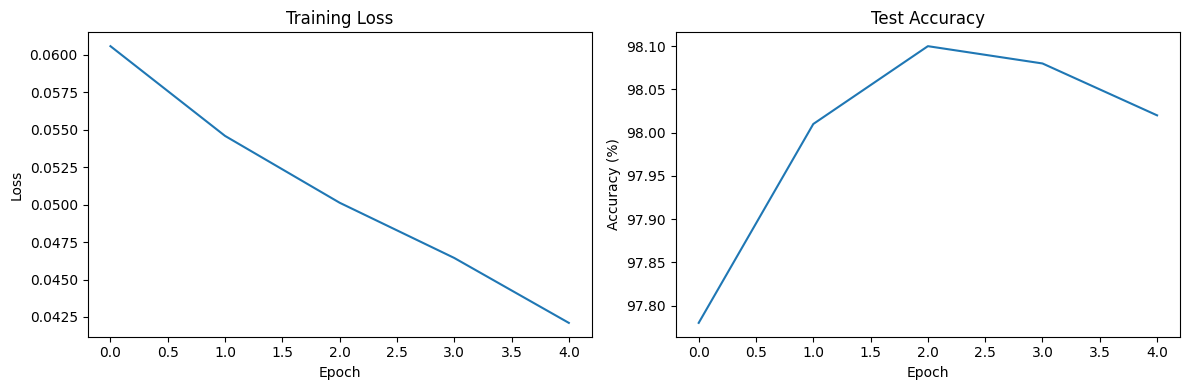

Model saved as 'mnist_model.pth'


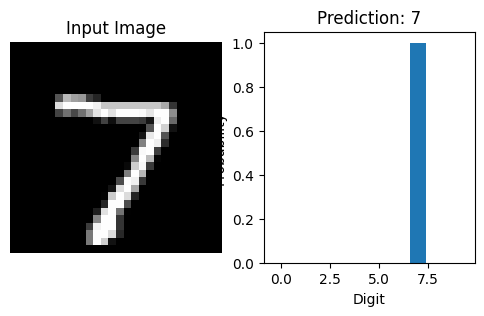

Predicted digit: 7


In [40]:
# Plot training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(test_accuracies)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig('training_progress.png')
plt.show()

# Save the trained model
torch.save(model.state_dict(), 'mnist_model.pth')
print("Model saved as 'mnist_model.pth'")

# Demonstrate prediction on a single image
def predict_single_image(model, test_loader, device):
    model.eval()
    with torch.no_grad():
        data, target = next(iter(test_loader))
        data = data[0:1]  # Take first image
        target = target[0:1]

        data = data.to(device)
        output = model(data)
        prediction = output.argmax(dim=1, keepdim=True).item()

        # Display the image
        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(data.cpu().squeeze(), cmap='gray')
        plt.title(f'Input Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.bar(range(10), F.softmax(output, dim=1).cpu().squeeze())
        plt.title(f'Prediction: {prediction}')
        plt.xlabel('Digit')
        plt.ylabel('Probability')
        plt.show()

        return prediction

# Make a prediction
prediction = predict_single_image(model, test_loader, device)
print(f"Predicted digit: {prediction}")
